# Data Scientist Professional Practical Exam Submission

## Data Validation

In [1]:
## Importing nessesary package for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset into dataframe
df = pd.read_csv("recipe_site_traffic_2212.csv")

## Checking all variables in the data against the given information
## Displaying dataset information
df.info()

## Counting missing values in each column
print(" ")
print("Missing Values")
print(df.isna().sum())

## Checking unique values in each columns
print(" ")
print("Unique values of category column: ", df.category.unique().tolist())
print("Unique values of servings column: ", df.servings.unique().tolist())
print("Unique values of high_traffic column: ", df.high_traffic.unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
 
Missing Values
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64
 
Unique values of category column:  ['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert']
Unique values of servings column:  ['

In [2]:
## Displaying rows with missing 'calories' data
df[df['calories'].isnull()].head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High


Based on the dataset, the following insight are observed:

1. Dataset contains 947 rows of data.
2. In recipes where 'calories' data is missing, the 'carbohydrate', 'sugar', and 'protein' columns also contain missing values.
3. The category "Chicken Breast" is absent from the provided data information in the 'category' column.
4. "servings" column datatype doesn't have numeric datatype as stated in data information.
5. "high_traffic" column has 373 missing values.

### Data Cleaning

**Calories**

Based on information above, it appears that the 'carbohydrate', 'sugar', and 'protein' columns have null values in recipes where 'calories' are missing. Given that each recipe is unique, even within the same category, it is likely that the Nutritional Information will differ between them. As a result, I have decided to remove the rows with missing values.

In [3]:
## Displaying rows where 'calories' is null
df[df['calories'].isna()].head()

## Deleting rows where 'calories' is null
df.dropna(subset=['calories'], inplace=True)

**Category**

I changed "Chicken Breast" label in the "category" column to "Chicken" to align with the established categories, which include "Lunch/Snacks," "Beverages," "Potato," "Vegetable," "Meat," "Chicken," "Pork," "Dessert," "Breakfast," and "One Dish Meal."

In [4]:
## Replacing "Chicken Breast" to "Chicken"
df['category'].loc[df['category'] == 'Chicken Breast'] = 'Chicken'

**Servings**

As for "servings" column, certain values have trailing characters "as a snack". To address this issue, I removed the trailing characters from each value and converted the datatype of the column to integer.

In [5]:
## Removing the substring 'as a snack' from the values in the 'serving' column
df['servings'] = df['servings'].map(lambda x: x.rstrip('as a snack')).str.strip()

## Converting the datatype of 'serving' column to numeric
df['servings'] = df['servings'].astype('int64')

**High Traffic**

Based on the given data information, when the traffic to the recipe was high, it's marked as "High" in the "high_traffic" column. Therefore I consider recipes with missing "high_traffic" values to have low traffic.

In [6]:
## Replacing missing values to 'Low'
## Converting 'high_traffic' to numeric where "High" is represented as 1 and "Low" as 0.
df['high_traffic'] = np.where((df['high_traffic'].isin(["High"])), 1, 0)

**Checking dataset after cleaning**

In [7]:
## Checking dataset after cleaning
## Displaying dataset information
df.info()

## checking missing values on dataset
print("Missing Values")
print(df.isna().sum())

## Checking unique values in each columns
print("Unique values of category column: ", df.category.unique().tolist())
print("Unique values of servings column: ", df.servings.unique().tolist())
print("Unique values of high_traffic column: ", df.high_traffic.unique().tolist())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  895 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 62.9+ KB
Missing Values
recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64
Unique values of category column:  ['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Pork', 'Vegetable', 'Meat', 'Dessert']
Unique values of servings column:  [4, 1, 2, 6]
Unique values of high_traff

The dataset contains 947 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the data information:

- recipe: Same as description in data information without missing values.
- calories : 52 missing values, so I decided to delete the rows.
- carbohydrate : 52 missing values, so I decided to delete the rows.
- sugar : 52 missing values, so I decided to delete the rows.
- protein : 52 missing values, so I decided to delete the rows.
- category : No missing values but not same as description, where I changed "Chicken Breast" values to "Chicken".
- servings : No missing values but not same as description. Some values contains trailing characters "as a snack",
- therefore I strip trailing characters of each value and change the datatype to integer.
- high_traffic : 373 missing values, based on provided data information, I decided to treat the missing value as low traffic and changed the datatype to integer where "High" is represented as 1 and "Low" as 0.

After the data cleaning, the dataset contains 895 rows and 8 columns with no missing values.

## Exploratory Analysis

In [8]:
## Displaying some rows from dataset
df.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1


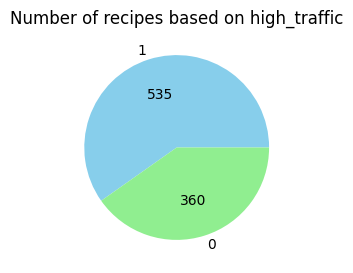

In [9]:
## Pie chart: Showing count of recipes based on high_traffic
plt.figure(figsize=(3, 3))
high_traffic_counts = df['high_traffic'].value_counts()
plt.pie(high_traffic_counts, labels=high_traffic_counts.index, autopct=lambda p: '{:.0f}'.format(p * high_traffic_counts.sum() / 100), colors=['skyblue', 'lightgreen'])
plt.title('Number of recipes based on high_traffic')
plt.show()

The pie diagram above shows that there are more 'High' values (535 data) than 'Low' values (360 data) for the 'high_traffic' variable.

### High traffic vs Category

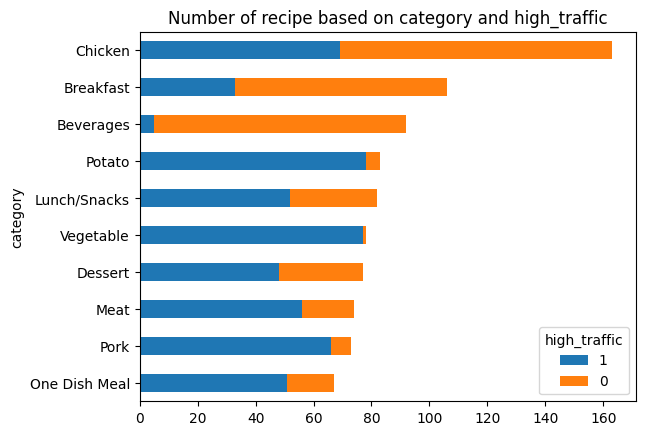

In [10]:
## Bar chart : Showing number of recipes based on category and high_traffic
df_stacked = df.groupby(['category', 'high_traffic']).size().reset_index().pivot(columns='high_traffic', index='category', values=0)
df_stacked['Total'] = df_stacked[0] + df_stacked[1] 
df_stacked.sort_values('Total', ascending=True, inplace=True)
df_stacked[[1,0]].plot(kind='barh', stacked=True)
plt.title('Number of recipe based on category and high_traffic')
plt.show()

Regarding the count, the categories 'Potato', 'Vegetable', and 'Chicken' have a higher number of observations with 'high_traffic' value of 'High'. However, in terms of percentage, the categories 'Vegetable', 'Potato', and 'Pork' respectively have a larger proportion of observations with 'high_traffic' value of 'High'.

Among the categories, 'Beverages' has the highest number of unpopular observations, followed by the 'Breakfast' category.

In [11]:
## Importing the required function
from scipy.stats import chi2_contingency

## Cross tabulation between category and high_traffic
crosstabResult = pd.crosstab(df['high_traffic'], df['category'])

## Performing Chi-sq test
chiSqResult = chi2_contingency(crosstabResult)
print('The P-Value of the ChiSq Test is:', chiSqResult[1])

The P-Value of the ChiSq Test is: 4.201574583161359e-60


To measure the correlation between 'high_traffic' and 'category', I used Chi-Square test. The result show very small p-value suggesting that there is indeed a significant association between the high_traffic and category variables.

**High traffic vs Nutritional Information (Calories, Carbohydrate, Sugar, Protein)**

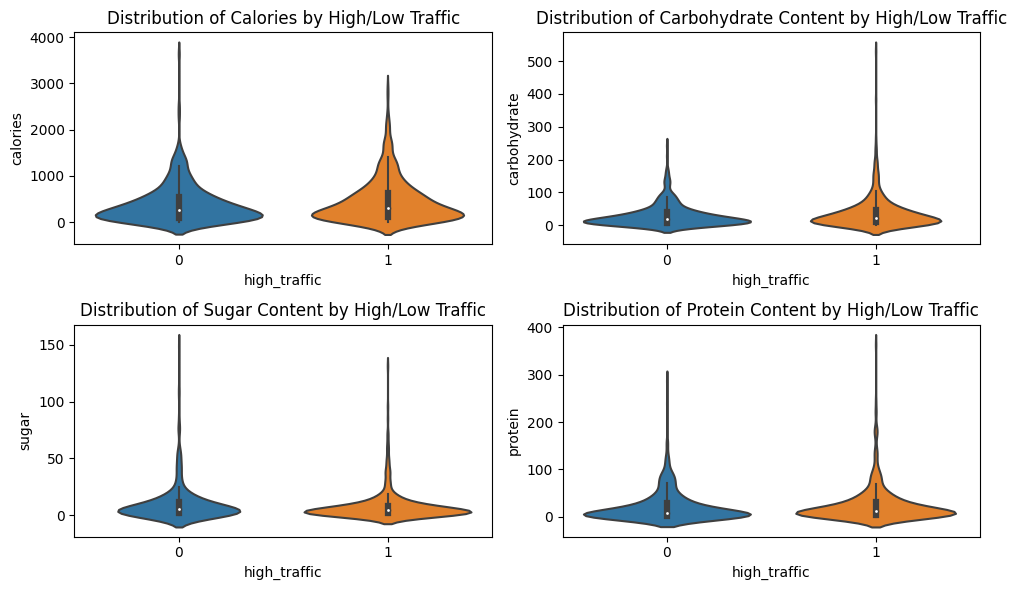

In [12]:
## Set up figure size
plt.figure(figsize=(10, 6))

## Distribution of nutritional values for high and low traffic
plt.subplot(2, 2, 1)
sns.violinplot(x='high_traffic', y='calories', data=df)
plt.title('Distribution of Calories by High/Low Traffic')

plt.subplot(2, 2, 2)
sns.violinplot(x='high_traffic', y='carbohydrate', data=df)
plt.title('Distribution of Carbohydrate Content by High/Low Traffic')

plt.subplot(2, 2, 3)
sns.violinplot(x='high_traffic', y='sugar', data=df)
plt.title('Distribution of Sugar Content by High/Low Traffic')

plt.subplot(2, 2, 4)
sns.violinplot(x='high_traffic', y='protein', data=df)
plt.title('Distribution of Protein Content by High/Low Traffic')

plt.tight_layout()
plt.show()

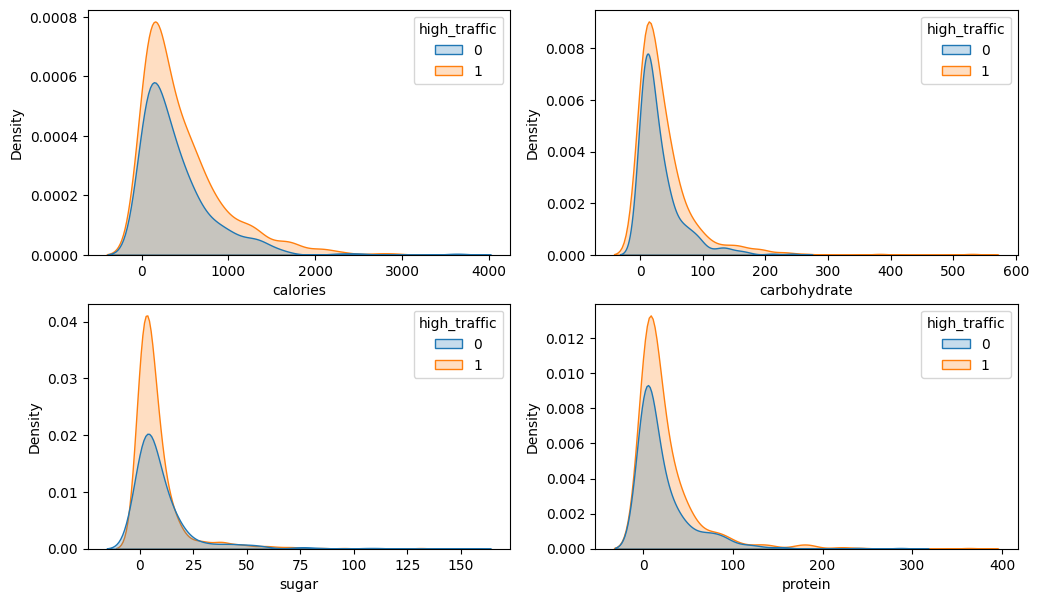

In [13]:
columns = ['calories', 'carbohydrate', 'sugar', 'protein']

## Distribution of nutritional values for high and low traffic
fig, ax = plt.subplots(2,2, figsize=(12,7))
for name, ax in zip(columns, ax.ravel()):
    sns.kdeplot(data=df, hue='high_traffic', x=name, shade=True, ax=ax)
plt.show()

Based on the density plot shown above, it's evident that the distribution of nutritional values (calories, carbohydrate, sugar, protein) doesn't show any significant differences between the categories 'High' and 'Low' in terms of high_traffic.

**High traffic vs Serving**

As shown on barplot below, regarding the count, the value "4" in the 'servings' column has a higher number of observations.

And for the boxplot below, it suggests that the distribution of servings is relatively similar for high and low traffic. This could mean that the number of servings might not be a strong differentiating factor between recipes that attract high traffic and those that attract low traffic.

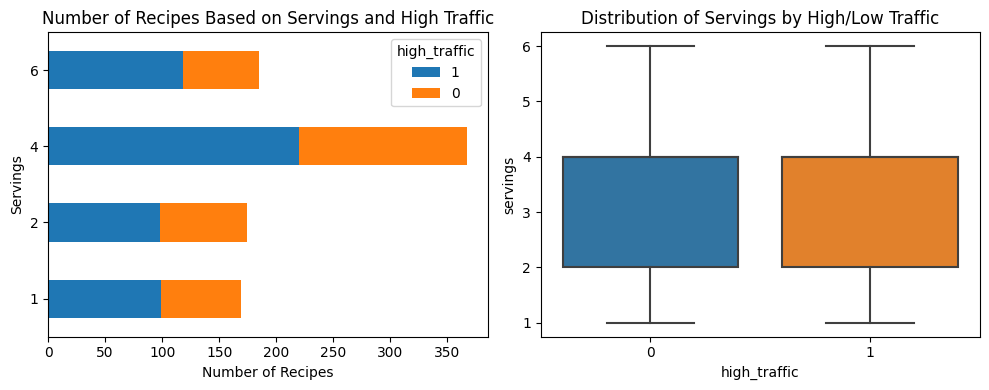

In [14]:
## Set up the figure size and subplots using gridspec
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

## Subplot 1: Showing number of recipes based on servings and high_traffic
ax1 = fig.add_subplot(gs[0])
serv_high = df.groupby(['servings', 'high_traffic']).size().reset_index().pivot(columns='high_traffic', index='servings', values=0)
serv_high['Total'] = serv_high[0] + serv_high[1] 
serv_high[[1, 0]].plot(kind='barh', stacked=True, ax=ax1)
ax1.set_title('Number of Recipes Based on Servings and High Traffic')
ax1.set_xlabel('Number of Recipes')
ax1.set_ylabel('Servings')

## Subplot 2: Distribution of servings by high and low traffic
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x='high_traffic', y='servings', data=df, ax=ax2)
ax2.set_title('Distribution of Servings by High/Low Traffic')

plt.tight_layout()
plt.show()

**Category vs Nutritional Information (Calories, Carbohydrate, Sugar, Protein)**

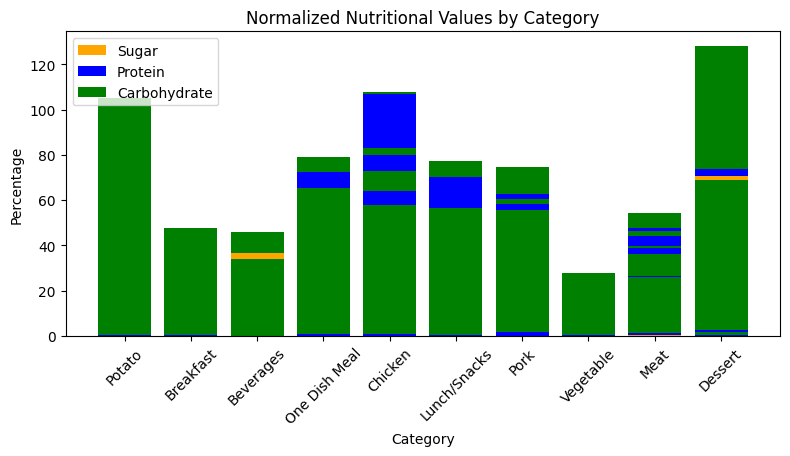

In [15]:
## Normalize the values to percentages based on their maximums
df_normalized = df.copy()
max_sugar = df_normalized['sugar'].max()
max_protein = df_normalized['protein'].max()
max_carbohydrate = df_normalized['carbohydrate'].max()

df_normalized['sugar_normalized'] = (df_normalized['sugar'] / max_sugar) * 100
df_normalized['protein_normalized'] = (df_normalized['protein'] / max_protein) * 100
df_normalized['carbohydrate_normalized'] = (df_normalized['carbohydrate'] / max_carbohydrate) * 100

## Set up the figure and subplots
plt.figure(figsize=(8, 4))

## Plotting the normalized values
plt.bar(df_normalized['category'], df_normalized['sugar_normalized'], label='Sugar', color='orange')
plt.bar(df_normalized['category'], df_normalized['protein_normalized'], label='Protein', color='blue', bottom=df_normalized['sugar_normalized'])
plt.bar(df_normalized['category'], df_normalized['carbohydrate_normalized'], label='Carbohydrate', color='green',
        bottom=df_normalized['sugar_normalized'] + df_normalized['protein_normalized'])

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Normalized Nutritional Values by Category')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Considering the categories of recipes, beverages and desserts have a notable proportion of sugar. On the other hand, chicken, lunch/snacks, one dish meal, pork, and meat recipes contain higher levels of protein compared to other categories.

**High traffic vs Calories, Carbohydrate, Sugar, Protein, Serving, Category**

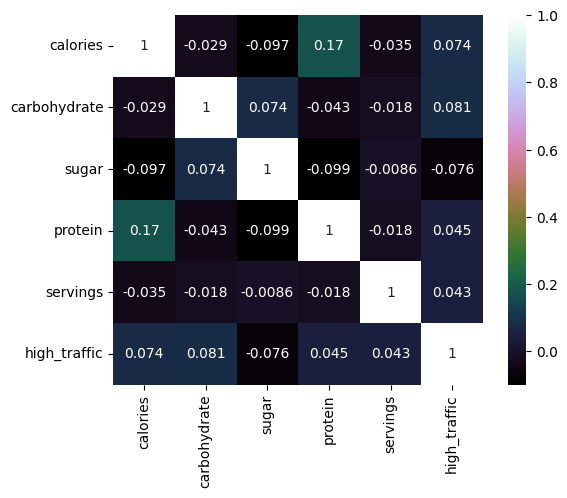

In [16]:
## Correlation Matrix
df_corr = df.drop(['recipe'], axis=1)
corr_matrix = df_corr.corr()

## Display the heatmap
sns.heatmap(corr_matrix,vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

Upon reviewing the correlation matrix, it becomes apparent that none of the columns demonstrate a significant correlation with the 'high_traffic' variable. The correlation coefficients fall within a low range (-0.076 to 0.081), signifying no association.

In [17]:
## Preprocessing the data
features = df.drop(columns=['recipe', 'high_traffic'])
X = pd.get_dummies(features)
y = df['high_traffic']

In [18]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.475513
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.294     
Dependent Variable:    high_traffic      AIC:               881.1682  
Date:                  2023-10-04 08:45  BIC:               953.1205  
No. Observations:      895               Log-Likelihood:    -425.58   
Df Model:              14                LL-Null:           -603.15   
Df Residuals:          880               LLR p-value:       3.4594e-67
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
calories                0.0000   0.0002  0.0402 0.9679 -0.0004  0.0004
car

The 'category' variable has a p-value less than 0.05 in relation to the 'high_traffic' variable. Therefore, the 'category' variable is considered statistically significant in influencing high_traffic.

## Model Development

In [19]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,1
2,3,914.28,42.68,3.09,2.88,Breakfast,1,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,1
4,5,27.05,1.85,0.80,0.53,Beverages,4,0
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,1


**Baseline Model - Logistic Regression**

Predicting whether a recipe will has high traffic (1) or not (0) is a binary classification problem. Therefore we can use a simple Logistic Regression model as a baseline model.

In [20]:
## Importing the required funtion
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


## Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Initialize model - Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred =logreg.predict(X_test)

**Comparison Model - Random Forest**

Random Forest is an ensemble of Decision Trees, which combines the predictions of multiple trees to improve accuracy and reduce overfitting. It exhibits robustness and effectively accommodates both linear and non-linear relationships between features and the target variable.

In [21]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

## Initialize model 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Model Evaluation

For model evaluation, we utilize both the classification report and cross-validation.

**Classification Report**

In [22]:
from sklearn.metrics import classification_report

## Evaluating Logistic Regression Model
print("Classification Report of Logistic Regression Model")
print(classification_report(y_test, logreg_pred))

## Print newline separator
print("")

# Evaluating Random Forest Model
print("Classification Report of Random Forest Model")
print(classification_report(y_test, rf_pred ))

Classification Report of Logistic Regression Model
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       109
           1       0.84      0.84      0.84       160

    accuracy                           0.81       269
   macro avg       0.80      0.80      0.80       269
weighted avg       0.81      0.81      0.81       269


Classification Report of Random Forest Model
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       109
           1       0.78      0.82      0.80       160

    accuracy                           0.75       269
   macro avg       0.75      0.74      0.74       269
weighted avg       0.75      0.75      0.75       269



As we can see on classification report, Logistic Regression (0.81) slightly outperforms Random Forest (0.77) in terms of accuracy. Precision of two models for both classes is relatively close. However, in term of recall, Logistic Regression (0.76 and 0.84) outperforms Random Forest (0.65 and 0.85).

**Cross Validation**

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std

## Evaluate model using cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

## Evaluate Logistic Regression model
logreg_cv = cross_val_score(logreg, X, y, cv=cv)
print("Logistic Regression CV Scores: %.3f (%.3f)" % (mean(logreg_cv), std(logreg_cv)))

## Evaluate Random Forest model
rf_cv = cross_val_score(rf, X, y, cv=cv)
print("Random Forest CV Scores: %.3f (%.3f)" % (mean(rf_cv), std(rf_cv)))

Logistic Regression CV Scores: 0.744 (0.034)
Random Forest CV Scores: 0.722 (0.039)


The Logistic Regression model achieved an average accuracy of 0.744 with a standard deviation of 0.034, while the Random Forest model achieved an average accuracy of 0.724 with a standard deviation of 0.027. This indicates that the Logistic Regression model tends to show slightly higher consistency and accuracy across different cross-validation folds compared to the Random Forest model.

Considering the classification report and cross validation score, my conclusion is that the Logistic Regression model has better performance when compared to the Random Forest model.

## Business Metrics

### Conclusive Overview and Prescribed Business Strategies

#### Question 1 : How should the business monitor what they want to achieve?
The business can monitor their objective by regularly evaluating the performance of the predictive model through various techniques. These include monitoring the accuracy rates and comparing the model's predictions against actual outcomes.
Here's some metrics can be integrated into monitoring strategy:
1. _Click-Through Rate (CTR)_ : This metric measures the proportion of users who clicked on a recipe after it was shown to them. A higher CTR indicates that users are finding the recipes appealing and engaging, which contributes to increased website traffic.
2. _High Traffic Recipe Prediction Accuracy (HTRPA)_ : This metric measures the accuracy of the model in predicting recipes that will lead to high traffic. 

HTRPA = (TP+TN)/(TP+TN+FP+FN), where:
- TP(True Positives) represents the number of high traffic recipes correctly predicted by the model.
- TN(True Negatives) represents the number of low traffic recipes correctly predicted by the model.
- FP(False Positives) represents the number of low traffic recipes incorrectly predicted as high traffic by the model.
- FN(False Negatives) represents the number of high traffic recipes incorrectly predicted as low traffic by the model.

How we monitor:
- Set the CTR threshold to categorize recipes as 'high_traffic.'
- Assess the actual CTR for each recipe on the website. Recipes that achieve or surpass the predefined CTR threshold are categorized as 'high_traffic.'
- Compare the model's predicted 'high_traffic' to the actual high_traffic recipes (as determined by CTR). Calculate the High Traffic Recipe Prediction Accuracy (HTRPA) to measure the model's effectiveness in identifying 'high_traffic' recipes in line with real-world performance.

Performance Assessment:
- If HTRPA attains 80%, it signifies that the model has successfully met the business objective.
- If a recipe has a high CTR and is correctly predicted as high-traffic (true positive), it indicates a strong alignment between user engagement and model predictions.
- If a recipe has a high CTR but is not predicted as high-traffic (false negative), it suggests a missed opportunity for improving the model's performance.
- Recipes with low CTR but are predicted as high-traffic (false positive) should be reviewed for model refinement.
- Recipes with low CTR and not predicted as high-traffic (true negative) may not significantly impact user engagement.

In summary, the business can monitor what they want to achieve by integrating CTR and HTRPA as key performance indicators. This combined approach ensures that our models recommend recipes that are not only engaging but also contribute to a significant increase in overall website traffic and, consequently, more subscriptions.

#### Question 2 : Estimate the initial value(s) for the metric based on the current data?
To estimate the initial value(s) for the metric based on the current data, the business can use existing dataset to calculate the baseline accuracy of the predictive model. We evaluated the performance of two models, Logistic Regression and Random Forest, based on our predefined KPI of achieving 80% accuracy. The Logistic Regression model successfully met our KPI by achieving precisely 80% accuracy, which aligns with our intended target. On the other hand, the Random Forest model reached an accuracy of 76%, falling slightly short of our 80% goal. While it still performs well, it doesn't quite reach our desired level of accuracy.

In [24]:
## Calculate the accuracy of the model
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy: ", logreg_accuracy)

Logistic Regression Accuracy:  0.8066914498141264


In [25]:
## Calculate the accuracy of model
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7546468401486989


### Prescribed Business Strategies
1. The Logistic Regression Model should be selected and deployed to predict which recipe will have high traffic because it has higher consistensy and accuracy 0.81 meaning it can to correctly predict high traffic recipes 80% of the time.
2. Based on p-value scores, there is a significant association between the 'high_traffic' and 'category'. This suggests that visitors might be making recipe choices based on the 'category', which could be due to its relevance and user-friendly nature. Therefore, we can explore the following strategies:
- Adding more variables : Consider introducing variables such as 'cooking_time', 'special_diets' (vegan, healthy & light, gluten-free), 'user_ratings', and 'difficulty_level' (easy, moderate, hard) to gain deeper insights into recipe preferences.
- Enhance the existing 'categories' variable: To improve the clarity and distinctness of recipe types, consider making the following refinements: introduce a "Seafood" category to encompass fish and seafood-based recipes, merge "Chicken", "Pork "and "Meat" into "Poultry & Meat" category, create a "Grilled & BBQ" category for recipes involving grilling and barbecuing, etc.
3. Reduce the likelihood of displaying less popular recipes, enhance the model and regularly monitor its performance.
4. Introduce more recipes in the 'Vegetable', 'Potato', and 'Pork' categories due to their higher percentage of observations generate high traffic.